In [0]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import sympy as sy
from matplotlib.patches import Rectangle

Exemplo: $$\int_0^2 x^3 + 3x^2 \,dx$$

Projeto 02 : $$\int_0^2 e^ {x -1} \,dx$$


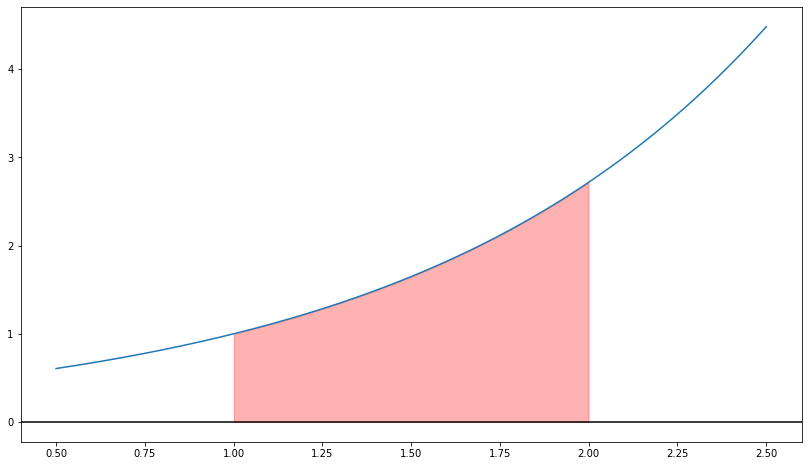

In [0]:
#func = lambda x : x ** 3 + 3 * x **2 
#func = lambda x : 1 / x  
e = 2.7182818284
func  = lambda x : e ** ( x - 1 )
i = 1
j = 2


x = np.linspace(0.5,2.5 , 1000)
plt.figure(figsize=(14,8))
plt.plot(x, func(x))
plt.axhline(color = 'black')
plt.fill_between(x, func(x), where = [(x > i) and x < j for x in x], color = 'red', alpha = '0.3')


In [0]:
x = sy.Symbol('x')
sy.integrate(func(x), (x, i, j))


1.71828182843732

In [0]:
import numpy as np
import sympy as sy
import pandas as pd

def ESQ(func, ini, end, precision):
    r = [x for x in np.linspace( ini, end, precision + 1) ]    
    apx = 0
    for i in range(len(r) - 1):
        apx += func(r[i]) * (r[i + 1] - r[i])        

    return apx

def DIR(func, ini, end, precision):
    r = [x for x in np.linspace( ini, end, precision + 1) ]        
    apx = 0
    for i in range(len(r) - 1):
        apx += func(r[i + 1]) * (r[i + 1] - r[i])
                

    return apx

def TRAP(func, ini, end, precision):
    r = [x for x in np.linspace( ini, end, precision + 1) ]    
    apx = 0
    for i in range(len(r) - 1):
        apx += ((func(r[i]) + func(r[i + 1])) / 2) * (r[i + 1] - r[i])        

    return apx

def MED(func, ini, end, precision):    
    r = [x for x in np.linspace( ini, end, precision + 1) ]    
    apx = 0
    for i in range(len(r) - 1):
        p_med = (r[i + 1] + r[i]) / 2
        apx += func(p_med) * (r[i + 1] - r[i])        

    return apx


def SIMP(med, trap):
    apx =  ((2 * med) + trap) / 3

    return apx


In [0]:
tabela = pd.DataFrame(columns=['N', 'ESQ', 'DIR', 'TRAP', 'MED', 'SIMP'])
erro_esq, erro_dir, erro_trap, erro_med, erro_simp = [], [], [], [], []

Ns = [2, 10, 50, 250]
for n in Ns:    
    v_apx_esq = ESQ(func , i, j, n)
    erro_esq.append(float(v_ext - v_apx_esq))


    v_apx_dir = DIR(func , i, j, n)
    erro_dir.append(float(v_ext - v_apx_dir))

    v_apx_trap = TRAP(func , i, j, n)
    erro_trap.append(float(v_ext - v_apx_trap))

    v_apx_med = MED(func , i, j, n)
    erro_med.append(float(v_ext - v_apx_med))

    v_simp = SIMP(float(v_ext - v_apx_med), float(v_ext - v_apx_trap))
    erro_simp.append(v_simp)
    
tabela['N']     = Ns
tabela['ESQ']   = erro_esq
tabela['DIR']   = erro_dir
tabela['TRAP']  = erro_trap
tabela['MED']   = erro_med
tabela['SIMP']   = erro_simp
tabela.head()



,N,ESQ,DIR,TRAP,MED,SIMP
0,2,-0.631213,-1.490354,-1.060784,-1.007366,-1.025172
1,10,-0.940652,-1.112480,-1.026566,-1.024419,-1.025135
2,50,-1.008009,-1.042375,-1.025192,-1.025106,-1.025135
3,250,-1.021700,-1.028574,-1.025137,-1.025134,-1.025135


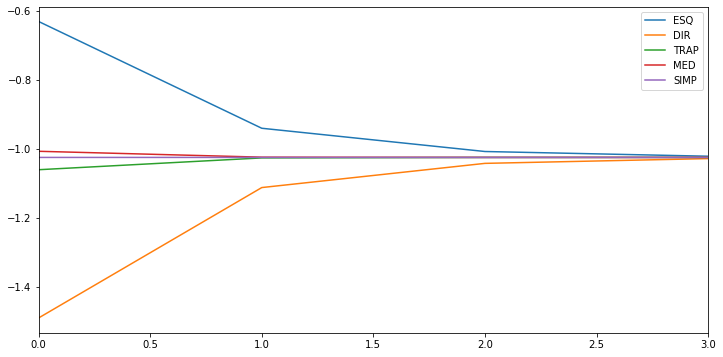

In [0]:
p = tabela.drop(columns=['N'])
p.plot.line(figsize=(12,6))